In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
df = pd.util.testing.makeTimeDataFrame(50)

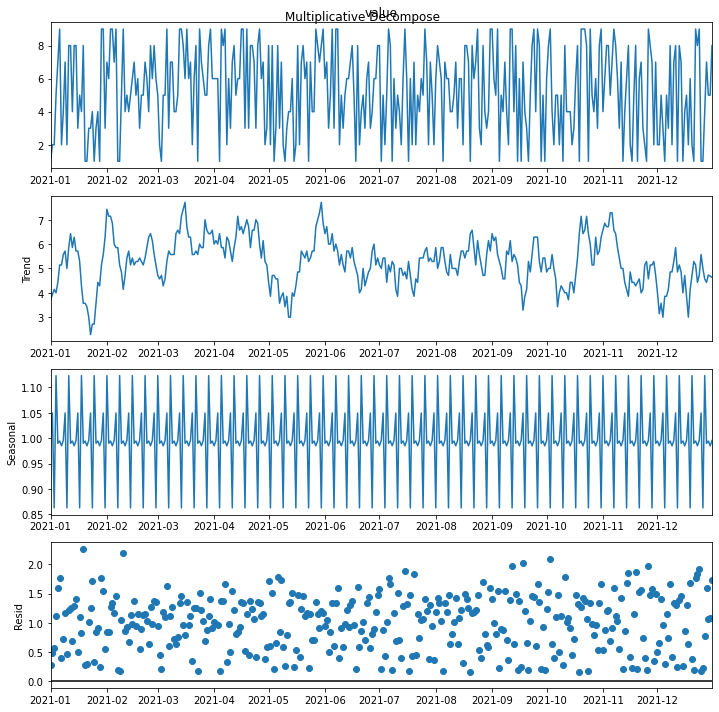

In [4]:
df = pd.DataFrame(np.random.randint(1, 10, size=(365, 1)), columns=['value'],
        index=pd.date_range('2021-01-01', periods=365, freq='D'))
result_mul = seasonal_decompose(df['value'],
             model='multiplicative',
             extrapolate_trend='freq')

plt.rcParams.update({'figure.figsize': (10, 10)})
result_mul.plot().suptitle('Multiplicative Decompose')
plt.show()

In [6]:
from scipy.fftpack import fft, fftfreq

fft_series = fft(df["value"].values)
power = np.abs(fft_series)
sample_freq = fftfreq(fft_series.size)

pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
powers = power[pos_mask]

top_k_seasons = 3
# top K=3 index
top_k_idxs = np.argpartition(powers, -top_k_seasons)[-top_k_seasons:]
top_k_power = powers[top_k_idxs]
fft_periods = (1 / freqs[top_k_idxs]).astype(int)

print(f"top_k_power: {top_k_power}")
print(f"fft_periods: {fft_periods}")

top_k_power: [102.31887311 113.9998144  122.47278152]
fft_periods: [5 2 3]


In [9]:
from datetime import timedelta
from statsmodels.tsa.stattools import acf

# Expected time period
for lag in fft_periods:
    # lag = fft_periods[np.abs(fft_periods - time_lag).argmin()]
    acf_score = acf(df["value"].values, nlags=lag)[-1]
    print(f"lag: {lag} fft acf: {acf_score}")


expected_lags = np.array([timedelta(hours=12)/timedelta(minutes=5), timedelta(days=1)/timedelta(minutes=5), timedelta(days=7)/timedelta(minutes=5)]).astype(int)
for lag in expected_lags:
    acf_score = acf(df["value"].values, nlags=lag, fft=False)[-1]
    print(f"lag: {lag} expected acf: {acf_score}")

lag: 5 fft acf: 0.0824111036246034
lag: 2 fft acf: -0.02019439967316263
lag: 3 fft acf: 0.026891070247978814
lag: 144 expected acf: 0.021357357221961137
lag: 288 expected acf: -0.02135108559105391
lag: 2016 expected acf: -0.0047620659329616075


/Users/renzhiqiang/miniforge3/envs/aiops/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

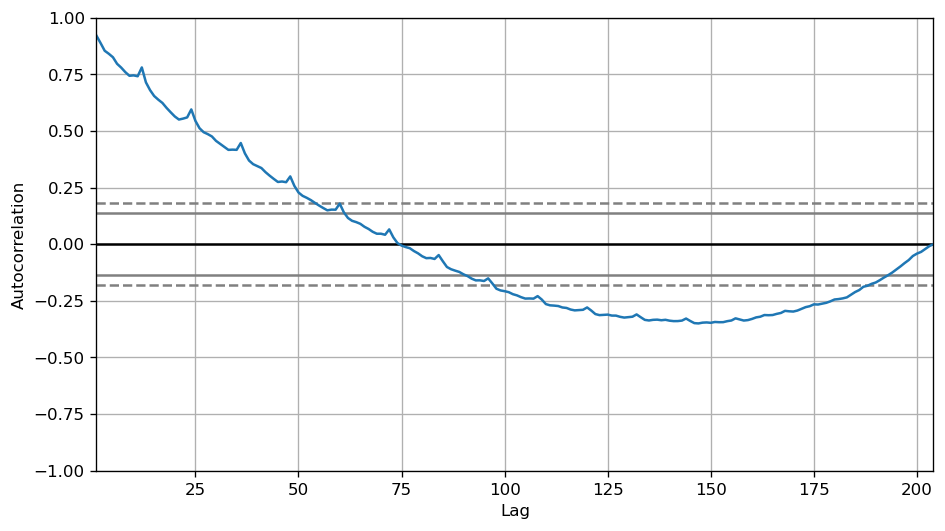

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
df = pd.read_csv('~/Workspace/a10.csv')
 
 
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())
